### DataFest Africa - January 2023 Data Challenge

##### Question 1


##### *On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.*


In [2]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# importing data

df = pd.read_csv(r"C:\Users\USER\OneDrive\Documents\DataFest Africa code review\Q1\2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
# Exploring data

df.isna().sum() #Checking for nulls

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [5]:
df.duplicated().sum() #Checking for duplicates

0

In [6]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


* *There are 5000 observations in the dataset.*
* *There are no null values or duplicates in the dataset.*
* *The average order amount is 3145.13; which is most likely how the naive AOV was computed.*

##### *a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.*

###### Firstly, what is AOV: 
###### *Hypothetially If your store has a total revenue of $2,000 split between 100 orders, your average order value is $20. This means that, on average, a customer spends $20 for each purchase from your store. 

###### *It is calculated as (Total Revenue) / (Total order made)* 


###### *Let's do a boxplot to check the spread of the order_amount*

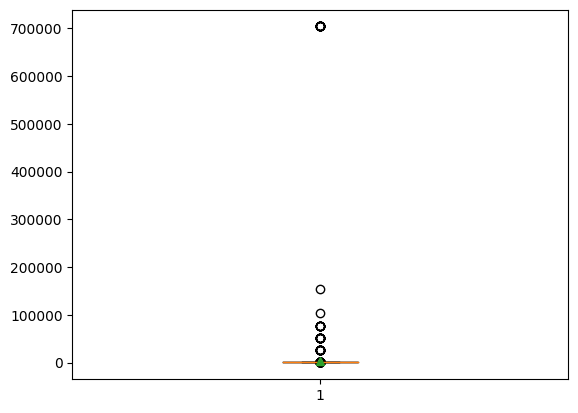

In [7]:
plt.boxplot(
    x=df['order_amount'],
    showmeans=True,
    showfliers=True
)

plt.show()

###### *There is an outlier of around $700,000 which would have most definitely skewed our mean.
###### What went wrong witht the naive computation of AOV was that it did not take into account the effect of Outliers*

##### *b. What metric would you report for this dataset?*

###### *To avoid the bias in AOV which the extremely high total_order values introduces, a better measure would be to use the median values (50th percentile).*

##### *c. What is the value of this metric?*

In [9]:
oa_median = df['order_amount'].median()

print(oa_median)

284.0


###### *The median value is $284 which is a far cry from $3145*